## In Class Assignment 1

Quantitatively, which pair of the following apartments is most similar?

|       | sq ft | bedrooms | bathrooms | toilets |
|-------|------:|---------:|----------:|---------|
| apt 0 |   850 |        2 |         1 | 1       |
| apt 1 |  1000 |        2 |         2 | 2       |
| apt 2 |  1300 |        3 |         2 | 2       |

- Define and clearly explain how you quantify whether two apartments are similar or different1
- Build a dataframe and explicilty compute each pair's distance
- Be warned, this example has a quirk we haven't yet seen in class.  You can resolve it yourself with some careful thinking, do what makes sense to you!


In [1]:
import pandas as pd
import numpy as np

In [2]:
# samples to be put in apartment dataframe, dropping the toilet column
# toilet column is dropped because it is essentially the same as the bathroom column
apt0 = {'apt': 'apt0', 'sq ft': 850, 'bedrooms': 2, 'bathrooms': 1, 'toilets': 1}
apt1 = {'apt': 'apt1', 'sq ft': 1000, 'bedrooms': 2, 'bathrooms': 2, 'toilets': 2}
apt2 = {'apt': 'apt2', 'sq ft': 1300, 'bedrooms': 3, 'bathrooms': 2, 'toilets': 2}

In [3]:
# apartment dataframe
df_apt = pd.DataFrame([apt0, apt1, apt2])
df_apt = df_apt.set_index(['apt'])
df_apt

,sq ft,bedrooms,bathrooms,toilets
apt,,,,
apt0,850,2,1,1
apt1,1000,2,2,2
apt2,1300,3,2,2


In [4]:
df_apt.var()

sq ft        52500.000000
bedrooms         0.333333
bathrooms        0.333333
toilets          0.333333
dtype: float64

In [5]:
# initializing scaled dataframe
df_apt_scaled = pd.DataFrame()

# scaling dataframe
for col in df_apt.columns:
    df_apt_scaled[f'{col}_scaled'] = df_apt[col] / df_apt[col].std()

In [6]:
df_apt_scaled.head()

,sq ft_scaled,bedrooms_scaled,bathrooms_scaled,toilets_scaled
apt,,,,
apt0,3.709704,3.464102,1.732051,1.732051
apt1,4.364358,3.464102,3.464102,3.464102
apt2,5.673665,5.196152,3.464102,3.464102


In [7]:
df_apt_scaled.var()

sq ft_scaled        1.0
bedrooms_scaled     1.0
bathrooms_scaled    1.0
toilets_scaled      1.0
dtype: float64

In [8]:
# drop toilets column, it is redundant from bathrooms
df_apt_scaled.drop('toilets_scaled', axis=1, inplace=True)

In [9]:
# scaled dataframe
df_apt_scaled.head()

,sq ft_scaled,bedrooms_scaled,bathrooms_scaled
apt,,,
apt0,3.709704,3.464102,1.732051
apt1,4.364358,3.464102,3.464102
apt2,5.673665,5.196152,3.464102


In [10]:
# creating apartment vectors
vec_apt0 = np.array(df_apt_scaled.iloc[0, :])
vec_apt1 = np.array(df_apt_scaled.iloc[1, :])
vec_apt2 = np.array(df_apt_scaled.iloc[2, :])

# computing distance between apartments
dist01 = np.linalg.norm(vec_apt0 - vec_apt1)
dist12 = np.linalg.norm(vec_apt1 - vec_apt2)
dist02 = np.linalg.norm(vec_apt0 - vec_apt2)

# printing distance statements
print(f'Distance between apt0 and ap1: {dist01}')
print(f'Distance between apt1 and apt2: {dist12}')
print(f'Distance between apt0 and apt2: {dist02}')

Distance between apt0 and ap1: 1.8516401995451033
Distance between apt1 and apt2: 2.171240593367237
Distance between apt0 and apt2: 3.1396087108337016


## In Class Assignment 2

Build a K-NN classifier which estimates whether a passenger on the titanic `survived` given their `age`, `pclass` and `fare` class.
- Discard any passengers which are missing a feature
- Be mindful of scale normalization, you may need to adjust data a bit
- Show the output of your classification as a confusion matrix plot, as shown above

In [11]:
import seaborn as sns

df_titanic = sns.load_dataset('titanic')
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [12]:
# drop NaN values
df_titanic.dropna(how='any', inplace=True)
df_titanic.drop(['sex', 'sibsp', 'parch', 'embarked', 'class', 'who', 'adult_male',
                'deck', 'embark_town', 'alive', 'alone'], axis=1, inplace=True)

In [13]:
# initializing empty dataframe
df_titanic_scaled = pd.DataFrame()

# scaling dataframe
for col in df_titanic.columns:
    df_titanic_scaled[f'{col}_scaled'] = df_titanic[col] / df_titanic[col].std()

In [14]:
from sklearn.neighbors import KNeighborsClassifier

k = 5
x_feat_list = ['age', 'pclass', 'fare']
y_feat = 'survived'

x = df_titanic.loc[:, x_feat_list].values
y_true = df_titanic.loc[:, y_feat].values

# initialize a knn_classifier
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# fit happens "inplace", we modify the internal state of knn_classifier to remember all the training samples
knn_classifier.fit(x, y_true)

# estimate each penguin's species
y_pred = knn_classifier.predict(x)

In [15]:
# zip together list of (truth, predict) pairs
true_pred_list = list(zip(y_true, y_pred))
true_pred_list[:5]

[(1, 1), (1, 1), (0, 0), (1, 1), (1, 0)]

In [16]:
from collections import Counter

# one way of getting a sense of how well we did
Counter(true_pred_list)

Counter({(1, 1): 114, (0, 0): 21, (1, 0): 9, (0, 1): 38})

In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np

conf_mat = confusion_matrix(y_true=y_true, y_pred=y_pred)

# examine confusion matri
conf_mat

array([[ 21,  38],
       [  9, 114]])

In [18]:
import matplotlib.pyplot as plt
import plotly.express as px

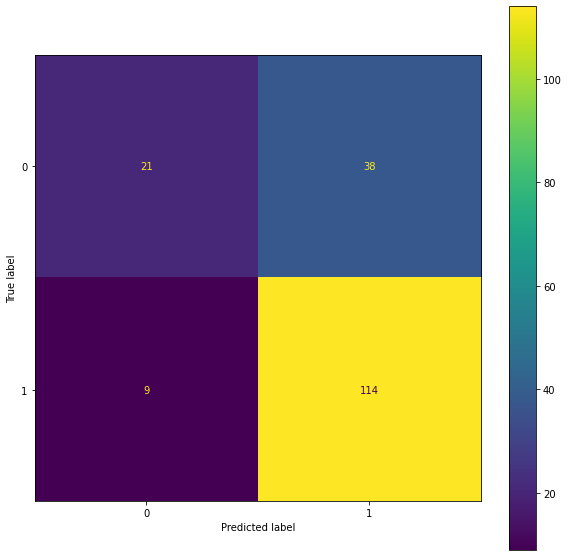

In [19]:
conf_mat_disp = ConfusionMatrixDisplay(conf_mat, display_labels=np.unique(y_true))
conf_mat_disp.plot()

plt.gcf().set_size_inches(10, 10)

# seaborn turns on grid by default ... looks best without it
plt.grid(False)